<a href="https://colab.research.google.com/github/AndresWV/AndresWV.github.io/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

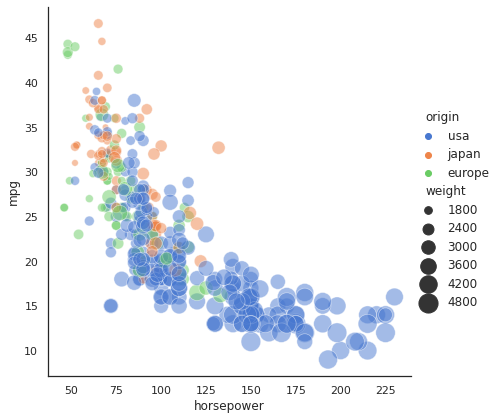

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="white")

mpg = sns.load_dataset("mpg")
mpg.sample(10)
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight", sizes=(40, 400), alpha=.5, palette="muted",height=6, data=mpg)


2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

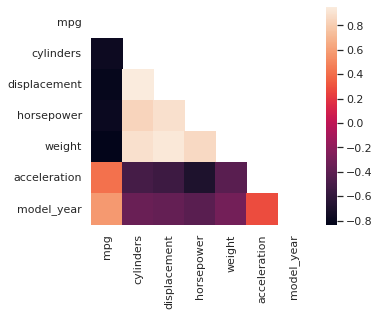

In [10]:

np.random.seed(0)
corr_matrix=mpg.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=True)

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [11]:
#Limpiar los datos NaN de cada columna y remplazarlos x la media de la columna
zero_not_accepted = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
for column in zero_not_accepted:
    mpg[column] = mpg[column].replace(0, np.NaN)
    mean = int(mpg[column].mean(skipna=True))
    mpg[column] = mpg[column].replace(np.NaN, mean)

#Convertir el origen de cada automóvil a 3 col distintas. donde 1.0 indicara que el automóvil pertenece a esa zona de origen
origin = mpg.pop('origin')
mpg['usa'] = (origin == 'usa')*1.0
mpg['europe'] = (origin == 'europe')*1.0
mpg['japan'] = (origin == 'japan')*1.0
mpg.tail()


#Limpiar los datos vacíos de los nombres de los automóviles
mpg['name'].fillna('dddddd')
#Cortar los nombres de los automóviles, para obtener las palabras por separado
mpg['name']=[i[0] for i in mpg['name'].str.split(' ')]
#eliminar los valores repetidos de las palabras separadas
mpg['name'].unique()
# estandarizan los nombres y modelos de los automóviles para generar un estandar al escribrlos
mpg['name']=mpg['name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
mpg['name']=mpg['name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
mpg['name']=mpg['name'].replace('maxda','mazda')
mpg['name']=mpg['name'].replace('toyouta','toyota')
mpg['name']=mpg['name'].replace('mercedes','mercedes-benz')
mpg['name']=mpg['name'].replace('nissan','datsun')
mpg['name']=mpg['name'].replace('capri','ford')
#separan los nombres y modelos en col con enumeraciones distintas, donde el valor 1 indica que el automóvil pertenece a esa marca/modelo
mpg=pd.concat([mpg,pd.get_dummies(mpg['name'],prefix='car')],axis=1)
mpg.drop('name',axis=1,inplace=True)
mpg.sample(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan,...,car_peugeot,car_plymouth,car_pontiac,car_renault,car_saab,car_subaru,car_toyota,car_triumph,car_volkswagen,car_volvo
65,14.0,8,351.0,153.0,4129,13.0,72,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
132,25.0,4,140.0,75.0,2542,17.0,74,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74,13.0,8,302.0,140.0,4294,16.0,72,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
78,21.0,4,120.0,87.0,2979,19.5,72,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
37,18.0,6,232.0,100.0,3288,15.5,71,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
54,35.0,4,72.0,69.0,1613,18.0,71,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
294,34.1,4,86.0,65.0,1975,15.2,79,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
60,20.0,4,140.0,90.0,2408,19.5,72,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,15.0,8,400.0,150.0,3761,9.5,70,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
341,23.5,6,173.0,110.0,2725,12.6,81,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#Para entrenar el modelo extraigo la col mpg
y_mpg = mpg.pop('mpg')
X_mpg = mpg
#split entre datos de validación y entrenamiento
Xtrain, Xtest, ytrain, ytest = train_test_split(X_mpg, y_mpg,test_size=199, train_size=199,random_state=0)
#Crear modelo de prediccioón lineal 
model = LinearRegression(fit_intercept=True)
#Entrenar
model.fit(Xtrain, ytrain)
#predecir
y_model = model.predict(Xtest)
mean_squared_error(y_model,ytest)

13.123975198368974

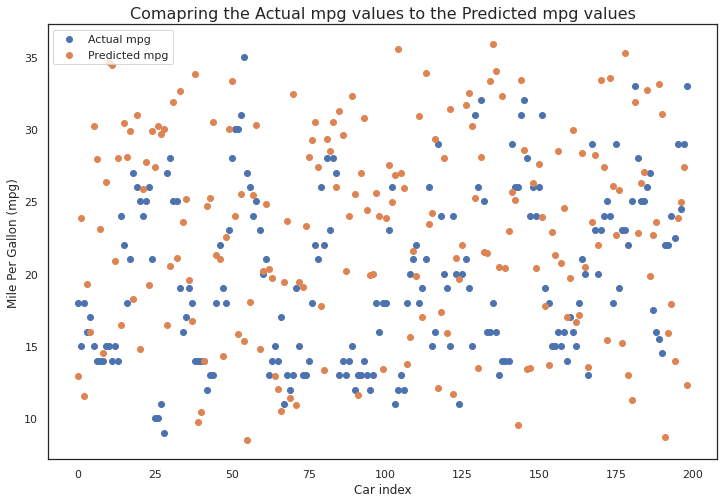

In [13]:

data = pd.DataFrame({'Actual mpg':y_mpg[:199],'Predicted mpg':y_model})
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()